In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes formula for option pricing
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return option_price, d1, d2

# Option Greeks calculations
def delta(S, K, T, r, sigma, option_type='call'):
    __, d1, _ = black_scholes(S, K, T, r, sigma, option_type)
    if option_type == 'call':
        return norm.cdf(d1)
    elif option_type == 'put':
        return norm.cdf(d1) - 1

def theta(S, K, T, r, sigma, option_type='call'):
    __, d1, d2 = black_scholes(S, K, T, r, sigma, option_type)

    call_theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
                  - r * K * np.exp(-r * T) * norm.cdf(d2))
    put_theta = call_theta + r * K * np.exp(-r * T)

    if option_type == 'call':
        return call_theta
    elif option_type == 'put':
        return put_theta

def gamma(S, K, T, r, sigma, option_type='call'):
    __, d1, _ = black_scholes(S, K, T, r, sigma, option_type)
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def vega(S, K, T, r, sigma, option_type='call'):
    __, d1, _ = black_scholes(S, K, T, r, sigma, option_type)
    return S * norm.pdf(d1) * np.sqrt(T)

# Need to confirm the sign for this one
def vanna(S, K, T, r, sigma, option_type='call'):
    __, d1, d2 = black_scholes(S, K, T, r, sigma, option_type)
    return -vega(S, K, T, r, sigma, option_type) * d2 / (S * sigma)

def volga(S, K, T, r, sigma, option_type='call'):
    __, d1, d2 = black_scholes(S, K, T, r, sigma, option_type)
    return vega(S, K, T, r, sigma, option_type) * (d1 * d2 / sigma)


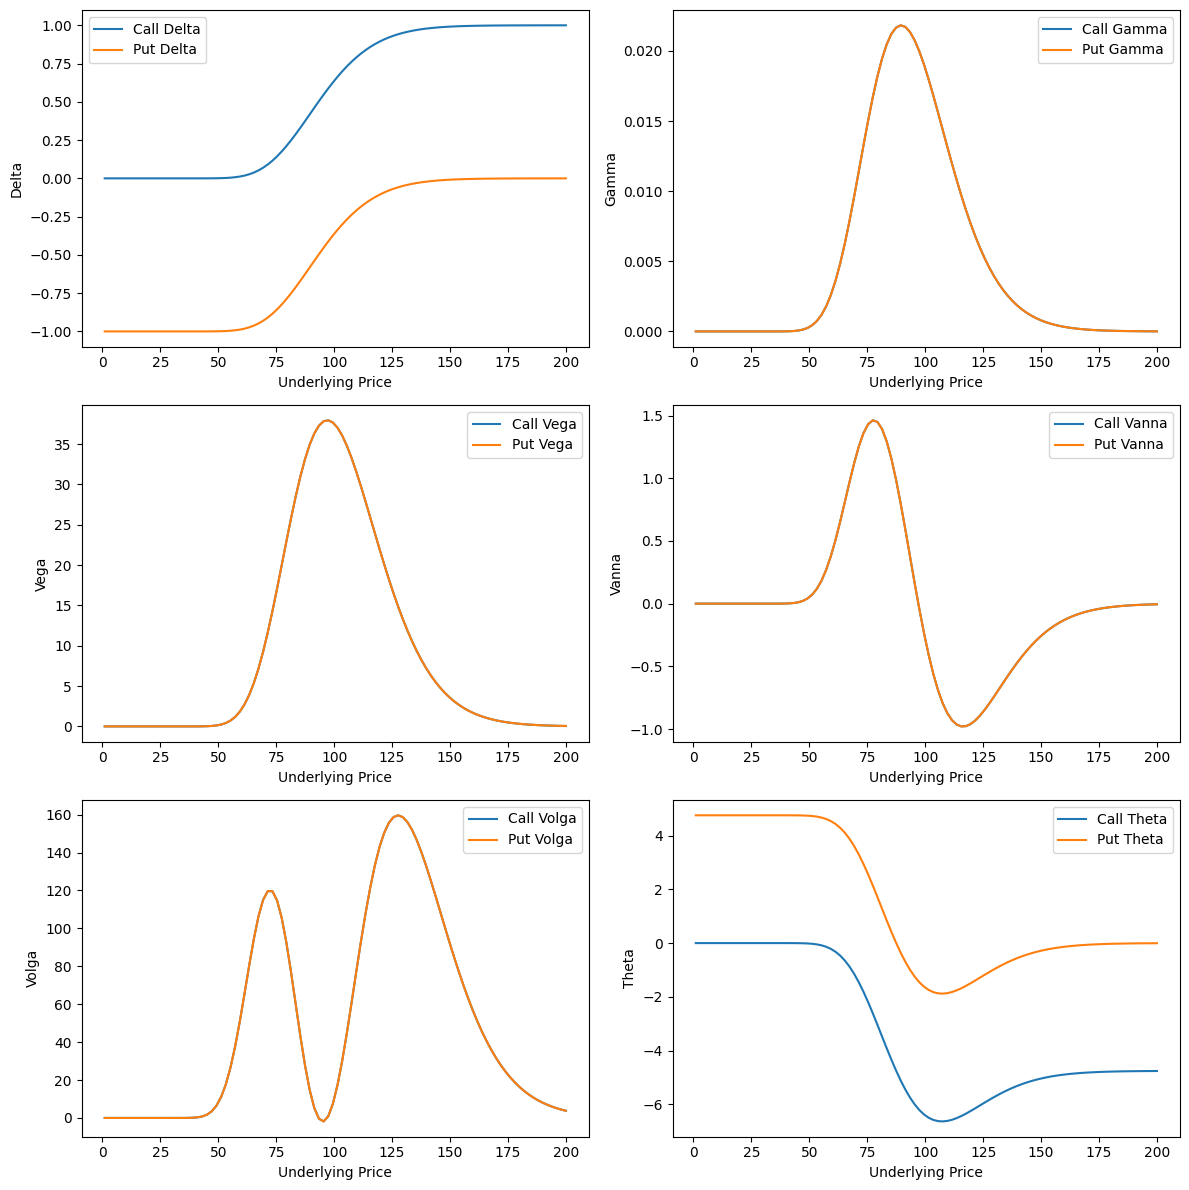

In [4]:
# Parameters
K = 100    # Strike price
T = 1      # Time to maturity (1 year)
r = 0.05   # Risk-free interest rate
sigma = 0.2  # Volatility

# Strike prices
underlying_prices = np.linspace(1, 200, 100)

# Calculate Greeks for call options
call_delta = [delta(S, K, T, r, sigma, 'call') for S in underlying_prices]
call_gamma = [gamma(S, K, T, r, sigma, 'call') for S in underlying_prices]
call_vega = [vega(S, K, T, r, sigma, 'call') for S in underlying_prices]
call_vanna = [vanna(S, K, T, r, sigma, 'call') for S in underlying_prices]
call_volga = [volga(S, K, T, r, sigma, 'call') for S in underlying_prices]
call_theta = [theta(S, K, T, r, sigma, 'call') for S in underlying_prices]

# Calculate Greeks for put options
put_delta = [delta(S, K, T, r, sigma, 'put') for S in underlying_prices]
put_gamma = [gamma(S, K, T, r, sigma, 'put') for S in underlying_prices]
put_vega = [vega(S, K, T, r, sigma, 'put') for S in underlying_prices]
put_vanna = [vanna(S, K, T, r, sigma, 'put') for S in underlying_prices]
put_volga = [volga(S, K, T, r, sigma, 'put') for S in underlying_prices]
put_theta = [theta(S, K, T, r, sigma, 'put') for S in underlying_prices]

# Plotting
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.plot(underlying_prices, call_delta, label='Call Delta')
plt.plot(underlying_prices, put_delta, label='Put Delta')
plt.xlabel('Underlying Price')
plt.ylabel('Delta')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(underlying_prices, call_gamma, label='Call Gamma')
plt.plot(underlying_prices, put_gamma, label='Put Gamma')
plt.xlabel('Underlying Price')
plt.ylabel('Gamma')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(underlying_prices, call_vega, label='Call Vega')
plt.plot(underlying_prices, put_vega, label='Put Vega')
plt.xlabel('Underlying Price')
plt.ylabel('Vega')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(underlying_prices, call_vanna, label='Call Vanna')
plt.plot(underlying_prices, put_vanna, label='Put Vanna')
plt.xlabel('Underlying Price')
plt.ylabel('Vanna')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(underlying_prices, call_volga, label='Call Volga')
plt.plot(underlying_prices, put_volga, label='Put Volga')
plt.xlabel('Underlying Price')
plt.ylabel('Volga')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(underlying_prices, call_theta, label='Call Theta')
plt.plot(underlying_prices, put_theta, label='Put Theta')
plt.xlabel('Underlying Price')
plt.ylabel('Theta')
plt.legend()

plt.tight_layout()
plt.show()



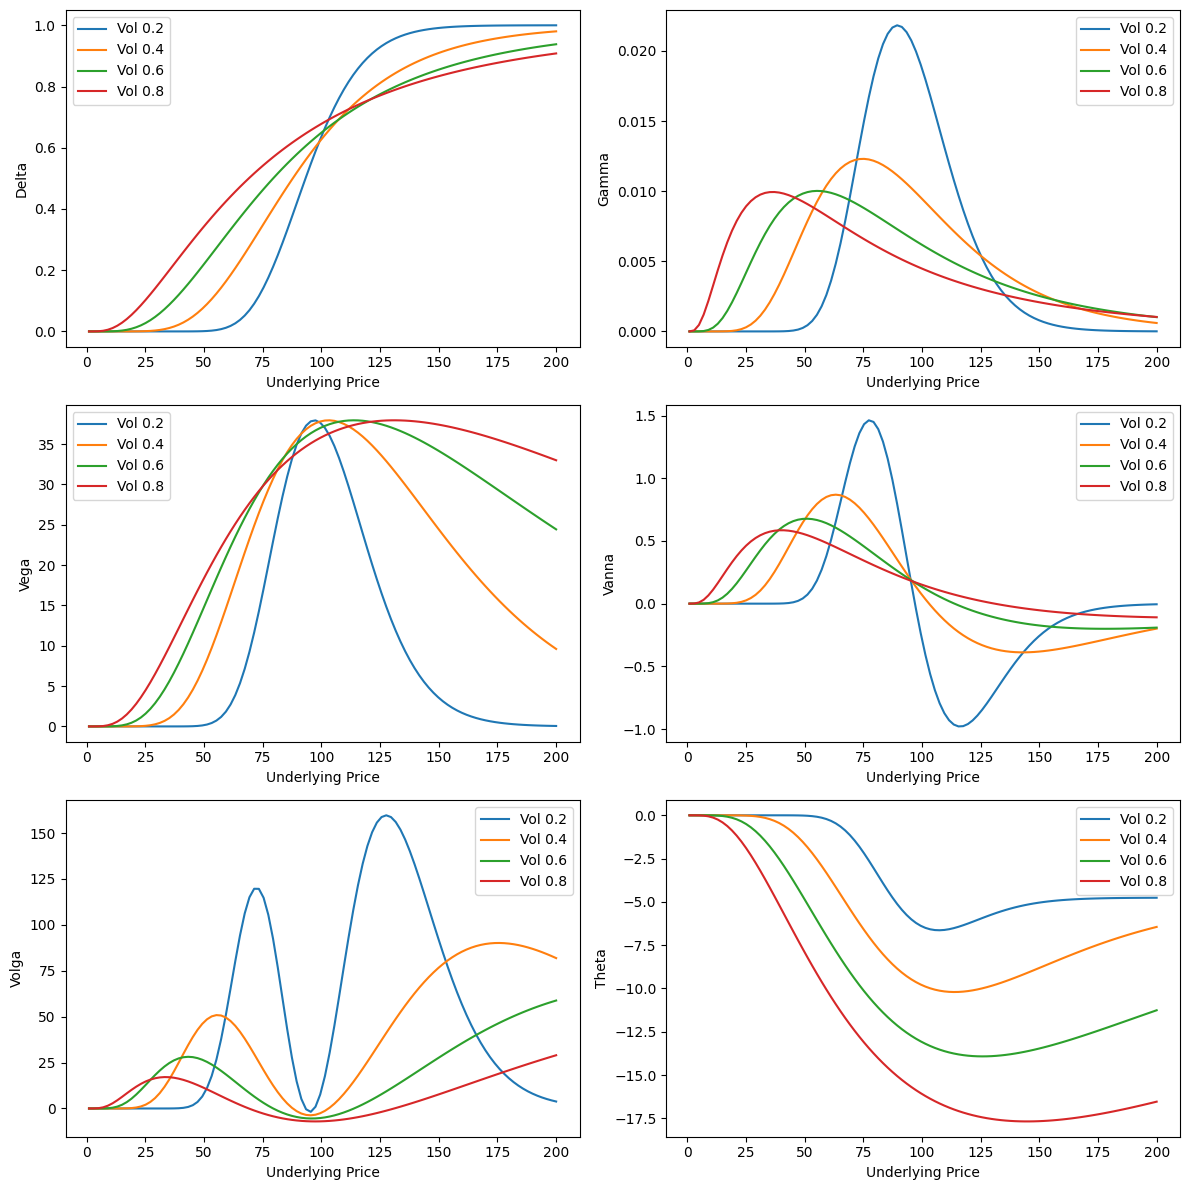

In [6]:
# Parameters
K = 100  # Strike price
T = 1    # Time to maturity (1 year)
r = 0.05 # Risk-free interest rate

volatilities = [0.2, 0.4, 0.6, 0.8]  # Different volatility values
underlying_prices = np.linspace(1, 200, 100)  # Range of underlying prices

# Plotting
plt.figure(figsize=(12, 12))

# Iterate over volatilities
for i, sigma in enumerate(volatilities, start=1):
    # Calculate Greeks for call options
    call_delta = [delta(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_gamma = [gamma(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_vega = [vega(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_vanna = [vanna(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_volga = [volga(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_theta = [theta(S, K, T, r, sigma, 'call') for S in underlying_prices]

    # Plot each Greek for the current volatility
    plt.subplot(3, 2, 1)
    plt.plot(underlying_prices, call_delta, label=f'Vol {sigma}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Delta')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(underlying_prices, call_gamma, label=f'Vol {sigma}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Gamma')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.plot(underlying_prices, call_vega, label=f'Vol {sigma}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Vega')
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.plot(underlying_prices, call_vanna, label=f'Vol {sigma}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Vanna')
    plt.legend()

    plt.subplot(3, 2, 5)
    plt.plot(underlying_prices, call_volga, label=f'Vol {sigma}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Volga')
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(underlying_prices, call_theta, label=f'Vol {sigma}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Theta')
    plt.legend()

plt.tight_layout()
plt.show()


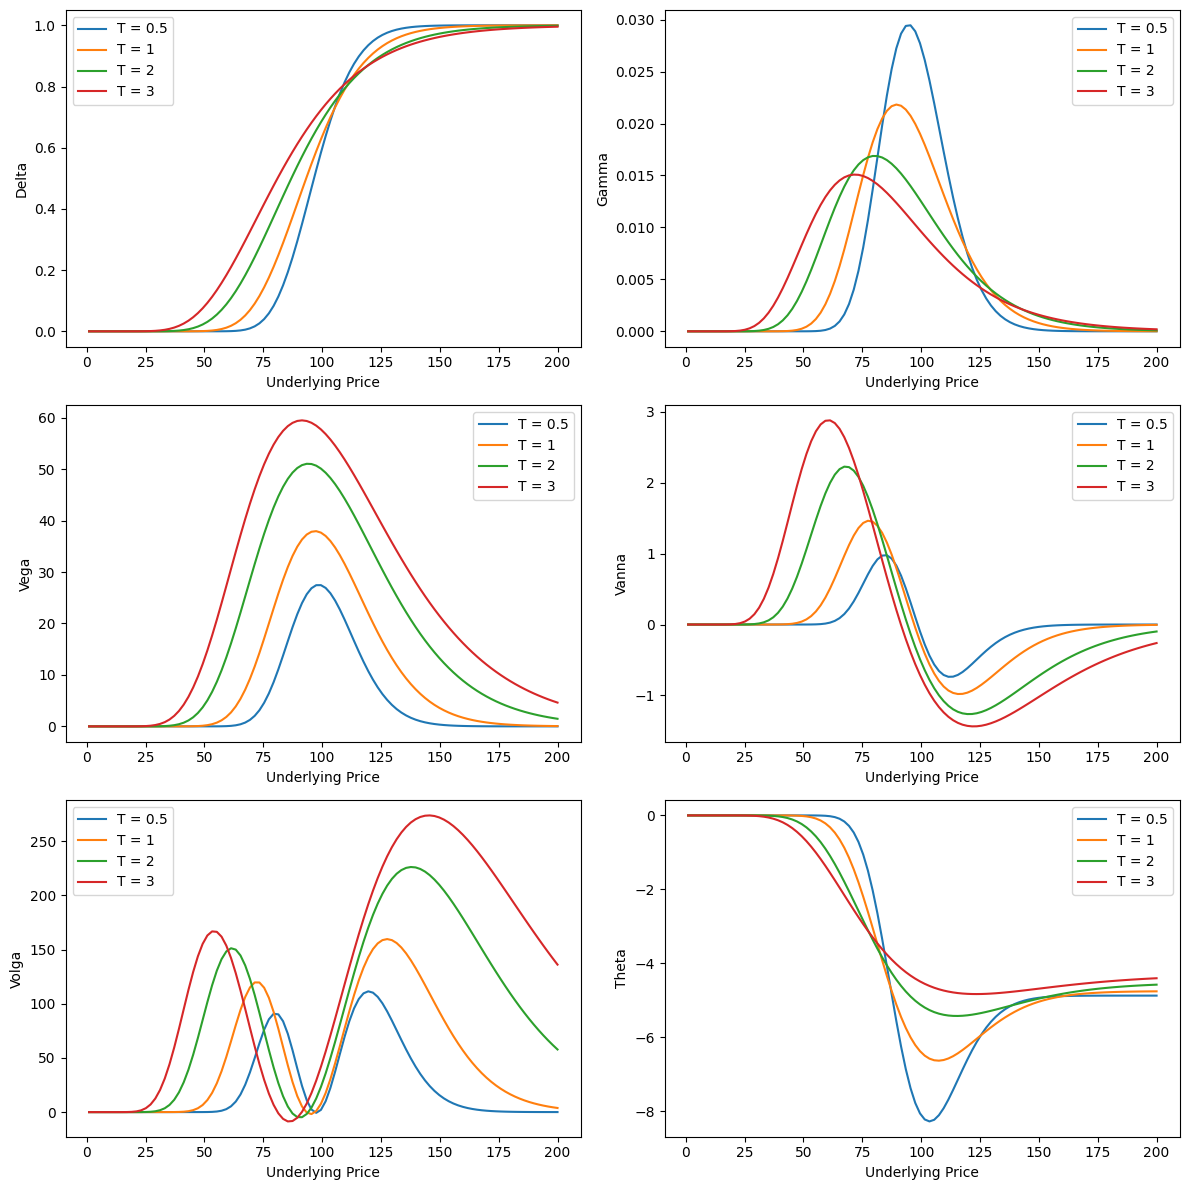

In [7]:
# Parameters
K = 100  # Strike price
sigma = 0.2
r = 0.05  # Risk-free interest rate
expiries = [0.5, 1, 2, 3]  # Different expiry values
underlying_prices = np.linspace(1, 200, 100)  # Range of underlying prices

# Plotting
plt.figure(figsize=(12, 12))

# Iterate over expiries
for i, T in enumerate(expiries, start=1):
    # Calculate Greeks for call options
    call_delta = [delta(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_gamma = [gamma(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_vega = [vega(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_vanna = [vanna(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_volga = [volga(S, K, T, r, sigma, 'call') for S in underlying_prices]
    call_theta = [theta(S, K, T, r, sigma, 'call') for S in underlying_prices]

    # Plot each Greek for the current expiry
    plt.subplot(3, 2, 1)
    plt.plot(underlying_prices, call_delta, label=f'T = {T}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Delta')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(underlying_prices, call_gamma, label=f'T = {T}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Gamma')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.plot(underlying_prices, call_vega, label=f'T = {T}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Vega')
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.plot(underlying_prices, call_vanna, label=f'T = {T}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Vanna')
    plt.legend()

    plt.subplot(3, 2, 5)
    plt.plot(underlying_prices, call_volga, label=f'T = {T}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Volga')
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(underlying_prices, call_theta, label=f'T = {T}')
    plt.xlabel('Underlying Price')
    plt.ylabel('Theta')
    plt.legend()

plt.tight_layout()
plt.show()
